# 문제 제시

In [17]:
# 비트코인의 시세 예측하기

# 용돈을 모은 돈으로 비트코인에 투자할지 고민입니다.
# 투자하기전에 파이썬으로 비트코인의 미래 시세를 예측해서
# 투자하는 것이 맞는 판단인지 아닌지 결정하고 싶습니다.

# 데이터 수집

In [1]:
# 프로핏 라이브러리 탑재

from prophet import Prophet

In [ ]:
# 수집 대상 선정하기
# 비트코인 데이터를 제공하는 coingecko 사이트 접속
 #(https://www.coingecko.com/ko/%EC%BD%94%EC%9D%B8/%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8/historical_data?start=2023-03-19&end=2023-06-17#panel)
 # 기록데이터를 우측 중단에 있는 다음으로 내보내기를 통해 csv파일 다운로드

In [3]:
# 데이터 수집하기

# 판다스 라이브러리 탑재
import pandas as pd

# csv 파일 읽어오기
data = pd.read_csv('/content/btc-usd-max.csv')

# 읽어온 데이터 확인하기
data

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.300000,1.500518e+09,0.000000e+00
1,2013-04-29 00:00:00 UTC,141.960000,1.575032e+09,0.000000e+00
2,2013-04-30 00:00:00 UTC,135.300000,1.501657e+09,0.000000e+00
3,2013-05-01 00:00:00 UTC,117.000000,1.298952e+09,0.000000e+00
4,2013-05-02 00:00:00 UTC,103.430000,1.148668e+09,0.000000e+00
...,...,...,...,...
3696,2023-06-13 00:00:00 UTC,25910.362743,5.025627e+11,9.761692e+09
3697,2023-06-14 00:00:00 UTC,25872.206459,5.017523e+11,9.921876e+09
3698,2023-06-15 00:00:00 UTC,25107.754696,4.872628e+11,1.198274e+10
3699,2023-06-16 00:00:00 UTC,25564.599633,4.957884e+11,1.518410e+10


In [4]:
# 데이터 정보 확인하기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    3701 non-null   object 
 1   price         3701 non-null   float64
 2   market_cap    3700 non-null   float64
 3   total_volume  3701 non-null   float64
dtypes: float64(3), object(1)
memory usage: 115.8+ KB


In [6]:
# 학습 대상 데이터프레임 생성
bitcoin_df = pd.DataFrame()

# snapped_at을 ds로 변경하고 시간대 정보 삭제(ex : 00:00:00 UTC)
bitcoin_df['ds'] = pd.to_datetime(data['snapped_at']).dt.tz_localize(None)

# price를 y로 변경
bitcoin_df['y'] = data['price']

# 학습 대상 데이터프레임 재생성
df = pd.DataFrame()

# 필요한 열만 추출하여 저장
df = bitcoin_df[['ds','y']]

# 새로 생성한 데이터프레임 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3701 non-null   datetime64[ns]
 1   y       3701 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.0 KB


# 전처리, 가공 및 시각화

In [7]:
# 프로핏 모델 객체 만들기
m = Prophet()

# 데이터프레임 학습하기
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7t9wyfo/s0qycle2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7t9wyfo/8roebng2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73366', 'data', 'file=/tmp/tmpm7t9wyfo/s0qycle2.json', 'init=/tmp/tmpm7t9wyfo/8roebng2.json', 'output', 'file=/tmp/tmpm7t9wyfo/prophet_model3iqkiye0/prophet_model-20230617070719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
# 예측 데이터프레임 준비하기
# 1000개의 예측 대상 데이터를 담을 데이터프레임을 만들고 값을 확인함
future = m.make_future_dataframe(periods = 1000)

# 끝부분 확인하기
future.tail()

,ds
4696,2026-03-09
4697,2026-03-10
4698,2026-03-11
4699,2026-03-12
4700,2026-03-13


In [10]:
# 예측하기
forecast = m.predict(future)

# 예측 결과 끝부분 확인하기
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

# ds : 날짜
# yhat : 예측값
# yhat_lower : 예측 최솟값
# yhat_upper : 예측 최댓값

,ds,yhat,yhat_lower,yhat_upper
4696,2026-03-09,-29199.940835,-72071.299222,10764.959639
4697,2026-03-10,-29221.093710,-73985.110998,12037.580504
4698,2026-03-11,-29239.685152,-72045.962869,11940.219590
4699,2026-03-12,-29224.527860,-72824.312149,12954.141937
4700,2026-03-13,-29262.358237,-72063.733835,12314.558002


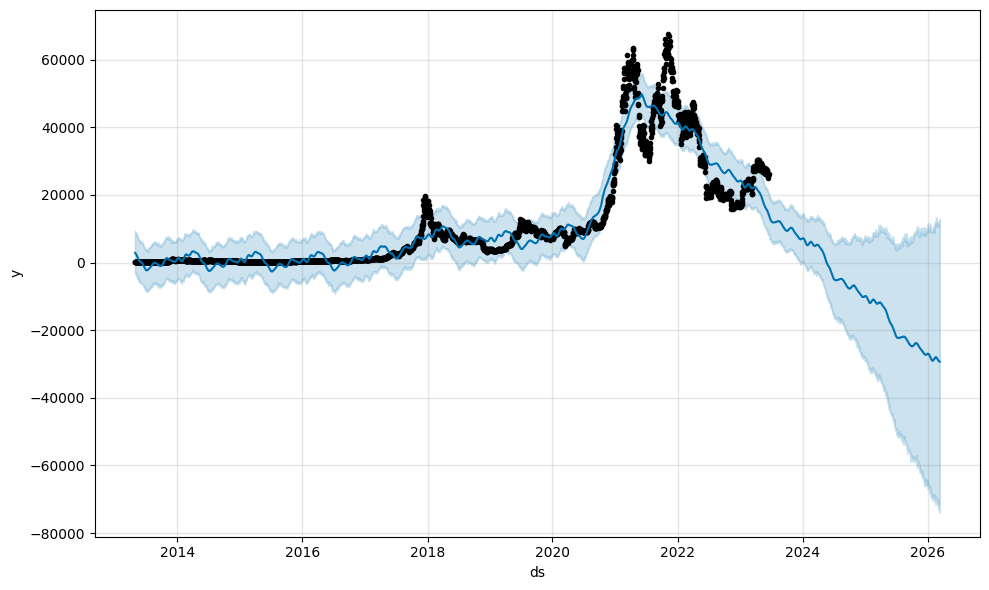

In [11]:
# 1차 예측 및 시각화

# 예측 결과 시각화하기
flg1 = m.plot(forecast)

In [ ]:
# 2021년부터 가격이 하락하면서 전체적인 예측값의 최댓값과 최솟값을 표현하는 파란색 영역이 크게 벌어지는 것을 확인할 수 있음
# 학습한 데이터의 값 변동 폭이 컸기 때문

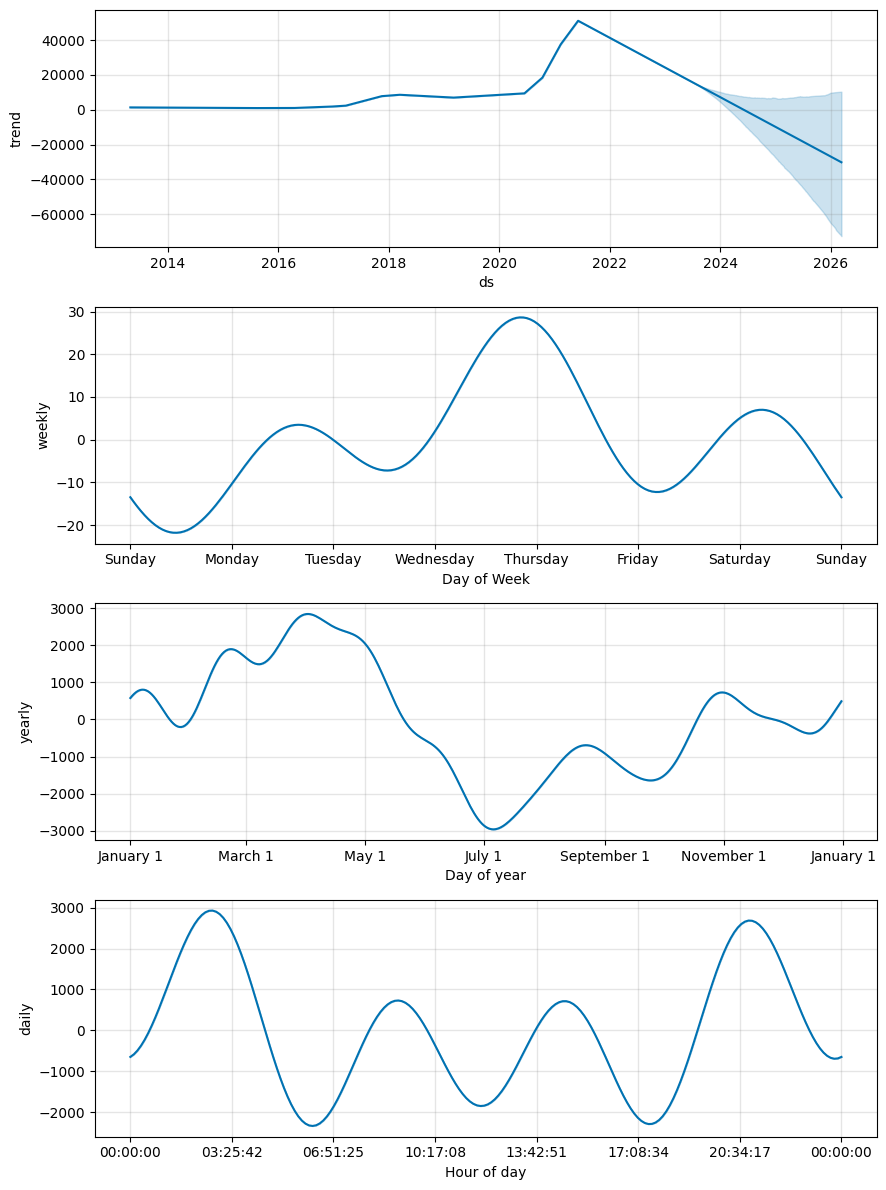

In [12]:
# 에측 컴포넌트 그래프 확인하기

flg2 = m.plot_components(forecast)

In [ ]:
# 학습한 데이터의 경향으로는 계속 하락할 것으로 전망
# 학습한 데이터의 일 단위 데이터 흐름 : 02~03시가 가장 높고 05시,17시에 가장 낮음
# 학습한 데이터의 주 단위 데이터 흐름 : 수요일에서 목요일을 넘어갈때 가장 높고, 일요일에서 월요일로 넘어갈때 가장 낮음
# 학습한 데이터의 월 단위 데이터 흐름 : 4월의 값이 가장 높고 7월이 가장 낮음


In [ ]:
# 데이터 범위를 좁혀 2차 예측 및 시각화

In [14]:
# 2차 예측을 위한 프로핏 객체 만들기
m2 = Prophet()

# 2023년 1월 1일 이후 데이터만 준비
df2 = df[df['ds'] > '2023-01-01']

# 데이터 끝 부분 확인하기
df2.tail()

,ds,y
3696,2023-06-13,25910.362743
3697,2023-06-14,25872.206459
3698,2023-06-15,25107.754696
3699,2023-06-16,25564.599633
3700,2023-06-17,26327.325669


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7t9wyfo/zdbcsx3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7t9wyfo/5nh7ty5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92897', 'data', 'file=/tmp/tmpm7t9wyfo/zdbcsx3_.json', 'init=/tmp/tmpm7t9wyfo/5nh7ty5g.json', 'output', 'file=/tmp/tmpm7t9wyfo/prophet_modelg40yc_7u/prophet_model-20230617071713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


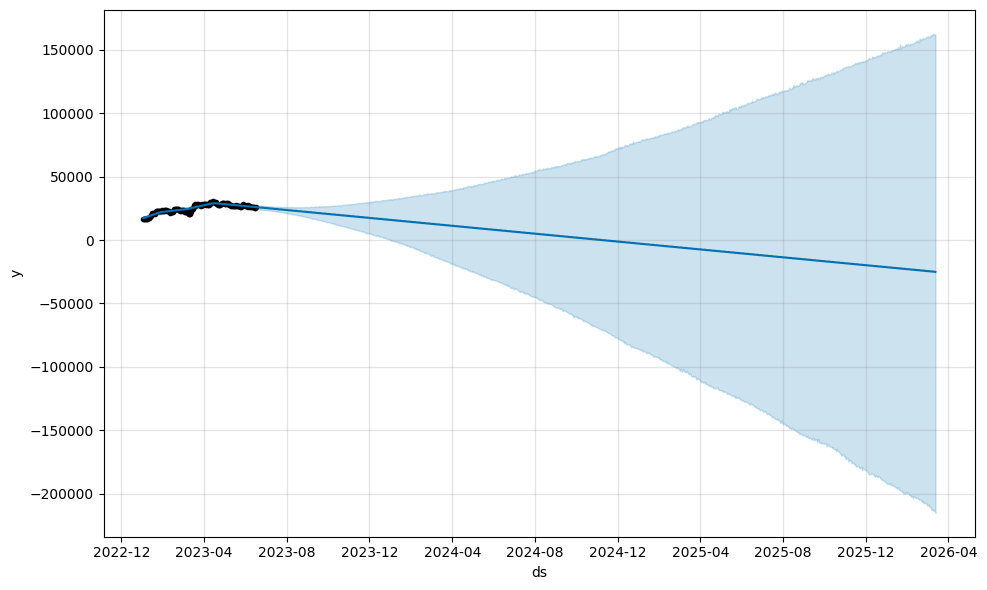

In [15]:
# 재예측하기

# 데이터 학습하기
m2.fit(df2)

# 예측 데이터프레임 만들기
future2 = m2.make_future_dataframe(periods = 1000)

# 예측하기
forecast2 = m2.predict(future2)

# 예측 결과 끝부분 확인하기
forecast2[['ds','yhat','yhat_lower','yhat_upper']].tail()

# 시각화하기
flg3 = m2.plot(forecast2)

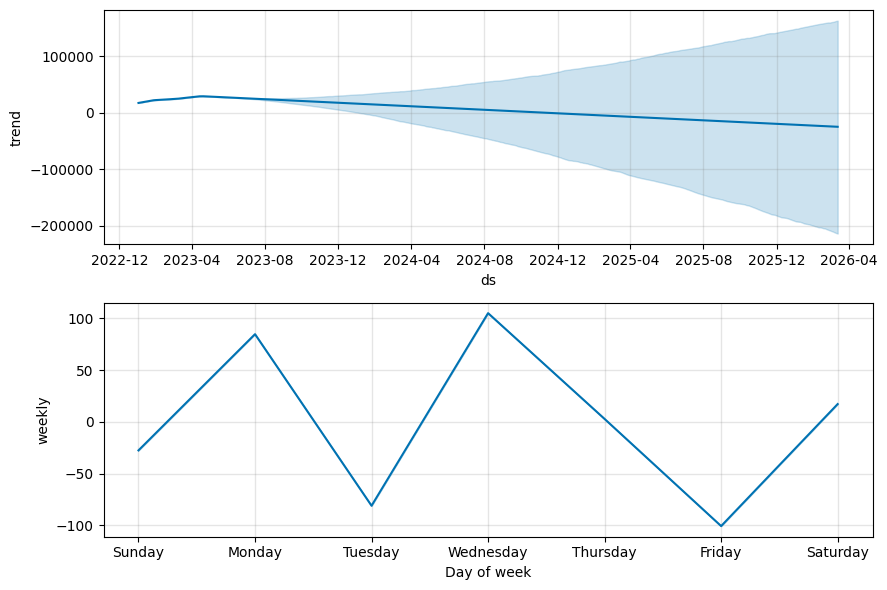

In [16]:
# 2차 예측 컴포넌트 확인하기
flg4 = m2.plot_components(forecast2)

In [ ]:
# 학습한 데이터의 경향으로는 계속 하락하거나 유지될 것으로 전망
# 학습한 데이터의 주 단위 데이터 흐름 : 수요일이 가장 높고 금요일이 가장 낮음

# 결론

In [ ]:
# 1차예측과 2차예측을 통해 비트코인의 가격이 하락할 것으로 예측됨
# 암호화폐 특성상 변동이 클 수 밖에 없고 시대적 상황에 따라 예측할 수 없는 변수가 굉장히 많음
# 위 예측결과를 토대로는 투자를 안하는 것을 추천!!